In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fancyimpute import KNN
import seaborn as sn
import os 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score,precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

Using TensorFlow backend.
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:

In [2]:
#Changing the working directory to the specified path as mentioned below--
os.chdir("D:/Edwisor_Project - Santander Prediction")

In [3]:
os.getcwd()

'D:\\Edwisor_Project - Santander Prediction'

In [4]:
data_train = pd.read_csv("train.csv") # training dataset

In [5]:
data_train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [6]:
data_train.shape

(200000, 202)

In [7]:
data_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
data_train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [9]:
data_train.dtypes.value_counts()

float64    200
int64        1
object       1
dtype: int64

In [10]:
data_test = pd.read_csv("test.csv") # testing dataset

In [11]:
data_test

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


In [12]:
data_test.shape

(200000, 201)

In [13]:
data_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [14]:
data_test.dtypes

ID_code     object
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object

In [15]:
data_test.dtypes.value_counts()

float64    200
object       1
dtype: int64

### From the above analysis of raw data, it is clear that the mean and median of testing as well as training data set is similar.
### The data is widely distribution as it carries large values of standard deviation.

# Insights from the above EDA--
## The independent variable ‘ID_code’ and the dependent variable ‘target’ happen to have NO relationship between them. Thus, we can drop the data column ‘ID_code’ from the dataset.


In [16]:
data_train = data_train.drop(['ID_code'],axis=1)
data_test = data_test.drop(['ID_code'],axis=1)

# MISSING VALUE ANALYSIS

In [17]:
print(data_train.isnull().sum())

target     0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64


In [18]:
print(data_train.isnull().sum())

target     0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64


## The data contains NO missing values

## Segregating the independent variables of the training dataset

In [19]:
numeric_col = [x for x in data_train.columns.values if x!='target']
train_independent = data_train[numeric_col]
train_dependent = data_train['target']

## DETECTION of OUTLIERS

In [20]:
def plot_box(data,begin,end):
  
  fig = plt.figure(figsize=(12,12))
 
  if(begin >=0 and end<len(numeric_col)):
    for i,z in enumerate(numeric_col[begin:end],1):
        ax = fig.add_subplot(6,5,i)
        sn.boxplot(x=train_independent.loc[:,z],ax=ax)
        plt.suptitle("....Outlier Analysis using boxplot....")
        
    plt.show()




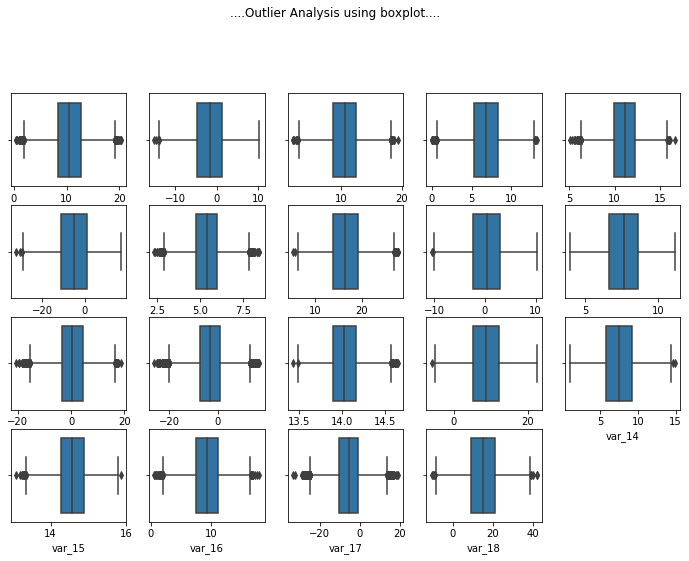

In [21]:
plot_box(train_independent ,0,19)

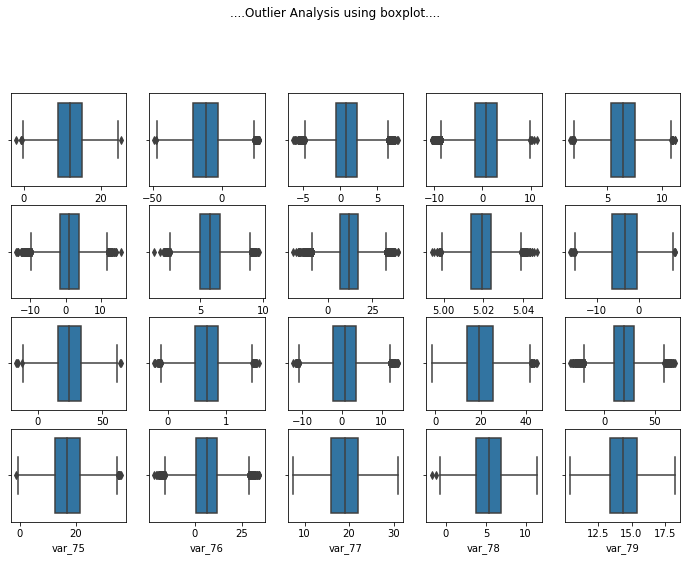

In [22]:
plot_box(train_independent ,60,80)

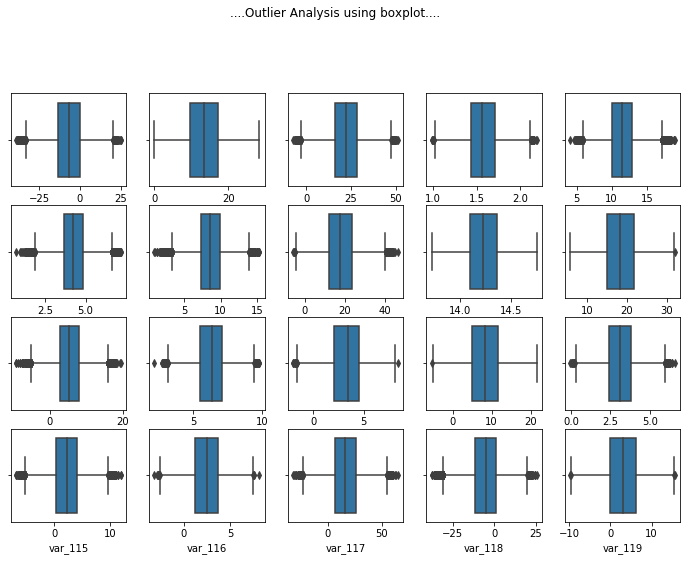

In [23]:
plot_box(data_train, 100,120)

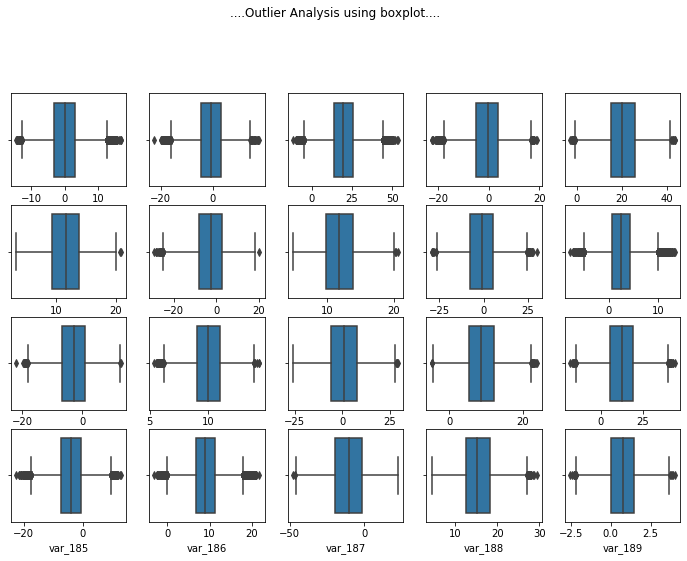

In [25]:
plot_box(data_train ,170,190)

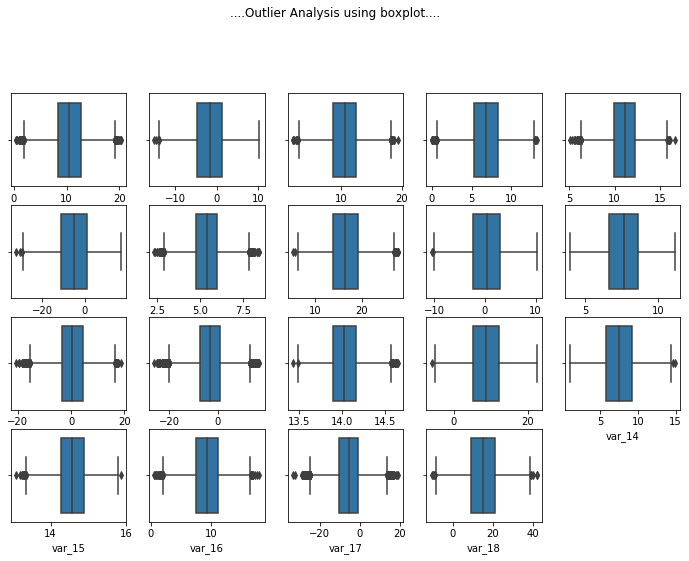

In [26]:
plot_box(data_test ,0,19)

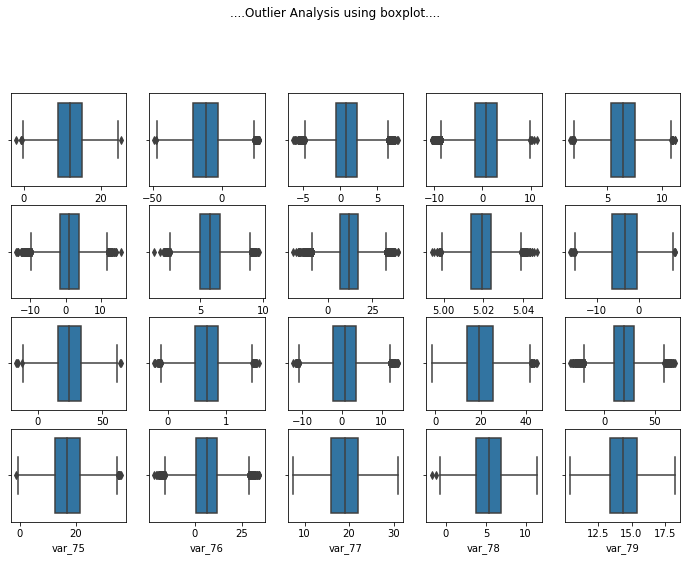

In [27]:
plot_box(data_test ,60,80)

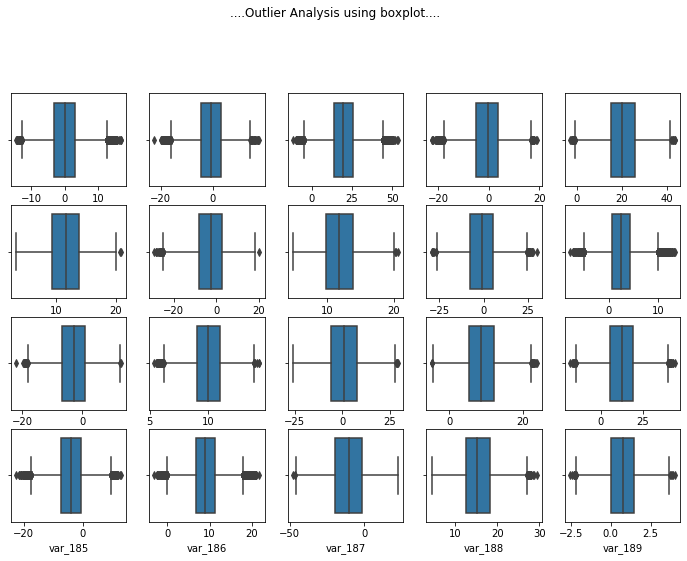

In [28]:
plot_box(data_test ,170,190)

## REMOVAL of OUTLIERS

In [29]:
def replace_outlier(df ,numerci_col): # replacing the outlier values with NULL
    for x in numeric_col:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan
    return df

In [30]:
train_independent = replace_outlier(train_independent,numeric_col)
data_test = replace_outlier(data_test,numeric_col)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [31]:
train_independent.isnull().sum()

var_0      104
var_1        6
var_2       49
var_3       22
var_4       76
          ... 
var_195    132
var_196      0
var_197     51
var_198     94
var_199     20
Length: 200, dtype: int64

In [32]:
data_test.isnull().sum()

var_0      122
var_1        4
var_2       56
var_3       13
var_4       89
          ... 
var_195    104
var_196      0
var_197     51
var_198    115
var_199     14
Length: 200, dtype: int64

## IMPUTATION OF OUTLIER values WITH MEAN

In [33]:
# 1. Imputation with mean
df_mean = train_independent.copy()

In [34]:
df_mean.loc[0,'var_0'] # 8.9255

8.9255

In [35]:
df_mean.loc[0,'var_0'] = np.nan

In [36]:
df_mean.loc[0,'var_0']

nan

In [37]:
df_mean.loc[df_mean['var_0'].isnull(),'var_0']=df_mean['var_0'].mean()

In [38]:
# 2. Imputation with median
df_median = train_independent.copy()

In [39]:
df_median.loc[0,'var_0']

8.9255

In [40]:
df_median.loc[0,'var_0'] = np.nan

In [41]:
df_median.loc[df_median['var_0'].isnull(),'var_0']=df_median['var_0'].median()

In [42]:
def MEAN_impute(df,column):
    for x in column:
        df.loc[df[x].isnull(),x]=df[x].mean()
    return df

In [43]:
train_independent = MEAN_impute(train_independent,numeric_col)
data_test = MEAN_impute(data_test,numeric_col)


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
train_independent.isnull().sum().sum()

0

In [45]:
data_test.isnull().sum().sum()

0

In [46]:
train_dependent.value_counts()

0    179902
1     20098
Name: target, dtype: int64

# DATA VISUALIZATION OF TARGET VARIABLE

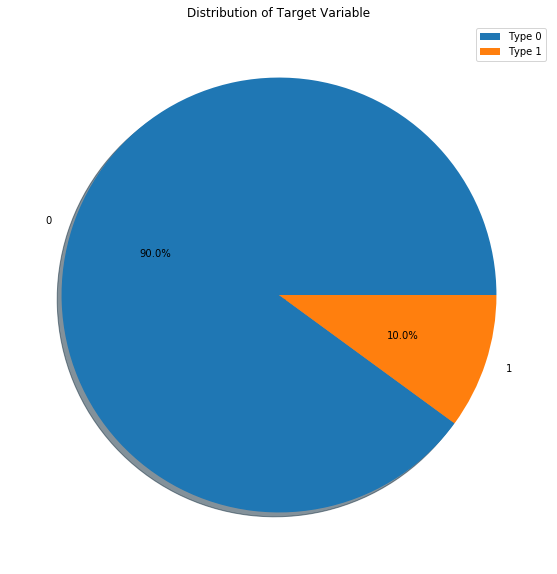

In [47]:
## Data Distribution
plt.figure(figsize=(10,10))
plt.pie(train_dependent.value_counts() ,labels=[0,1] ,autopct='%1.1f%%',shadow=True)
plt.title("Distribution of Target Variable")
plt.legend(['Type 0','Type 1'])
plt.show()

### From the above visualization, it is clear that the target variable has a data imbalance.

# DATA VISUALIZATION OF INDEPENDENT VARIABLES

In [48]:
def plot_dist(data,begin,end):
  
  fig = plt.figure(figsize=(12,12))
 
  if(begin >=0 and end<len(numeric_col)):
    for i,z in enumerate(numeric_col[begin:end],1):
        ax = fig.add_subplot(6,5,i)
        sn.distplot(train_independent.loc[:,z],color='green',ax=ax)
        plt.suptitle("....DistPlot of Independent variables....")
        
    plt.show()

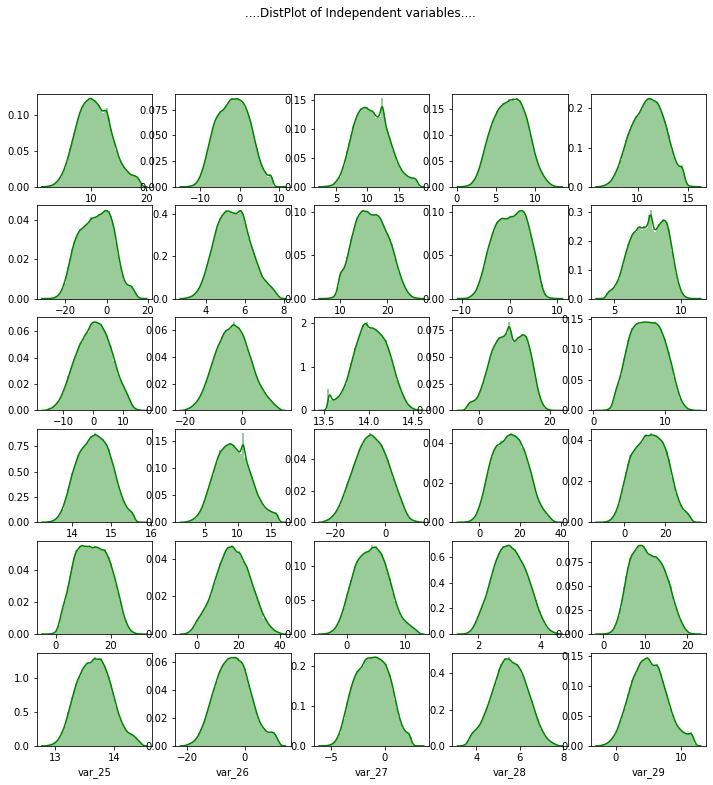

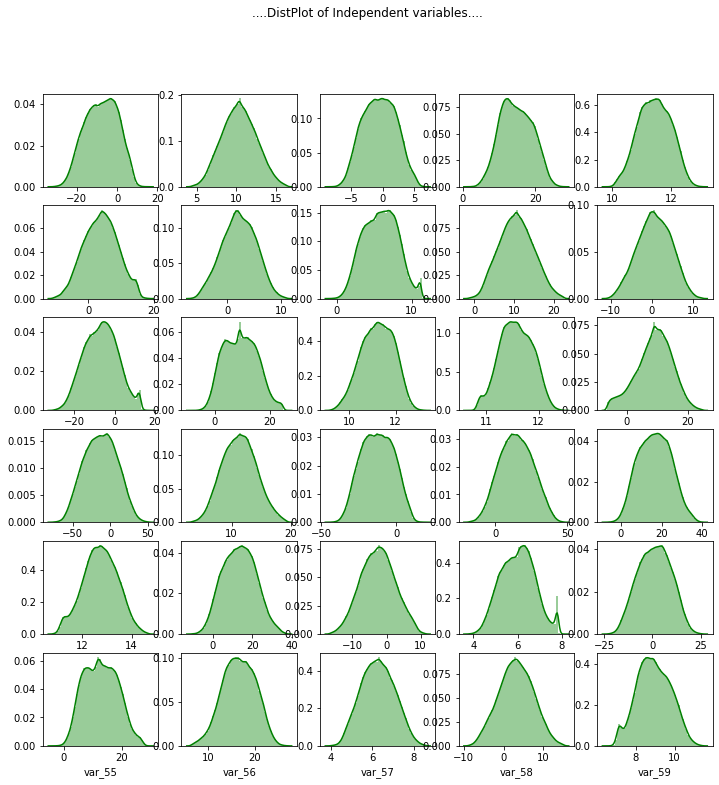

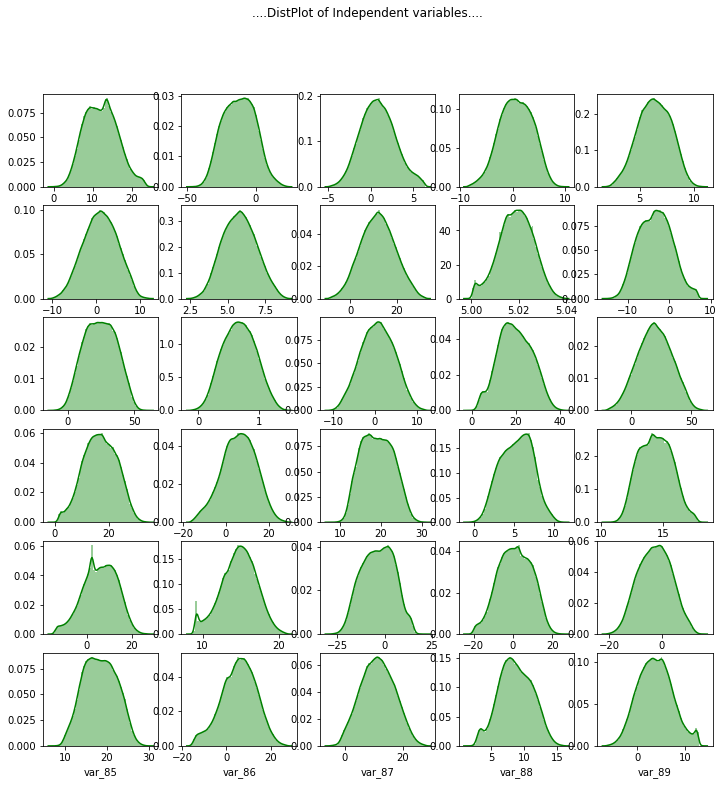

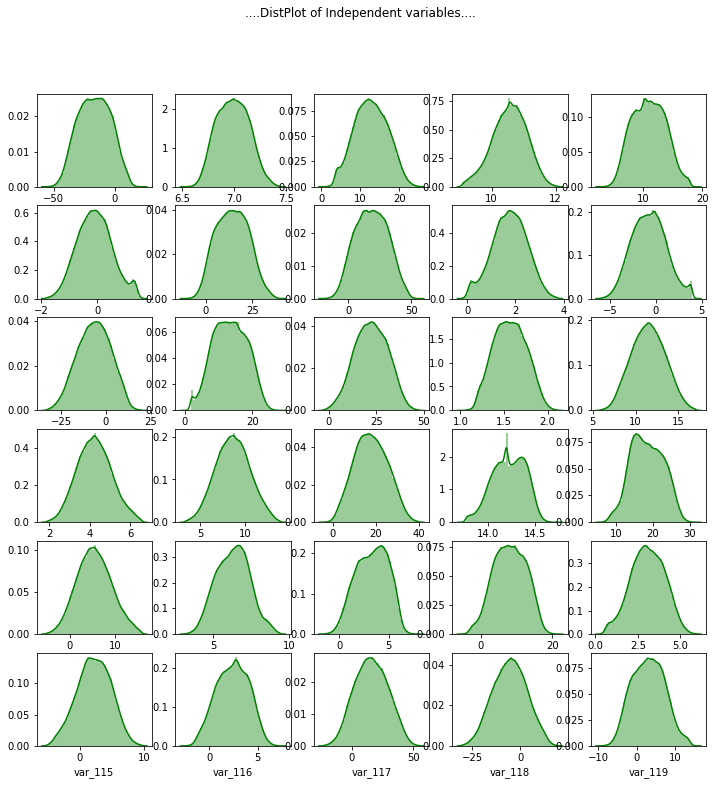

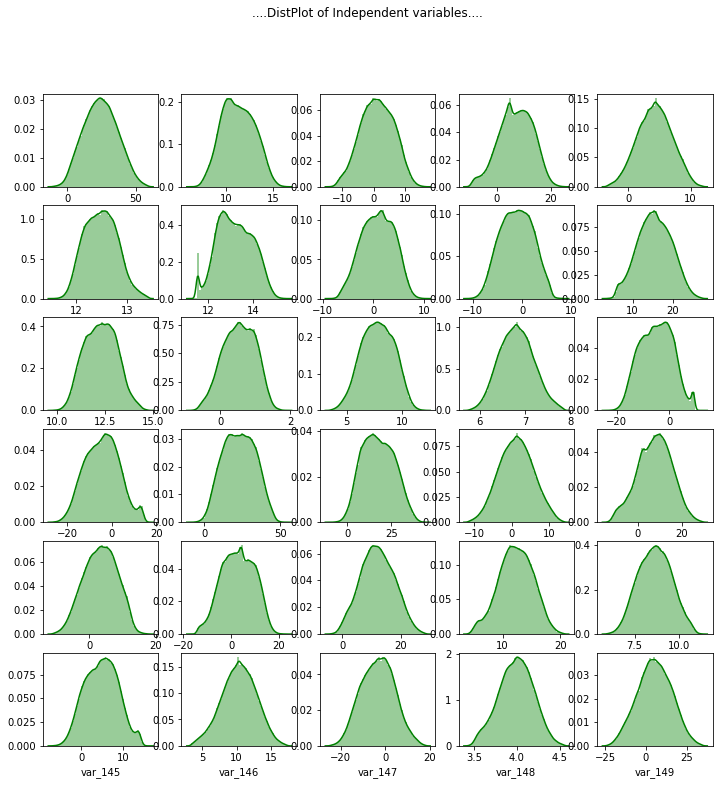

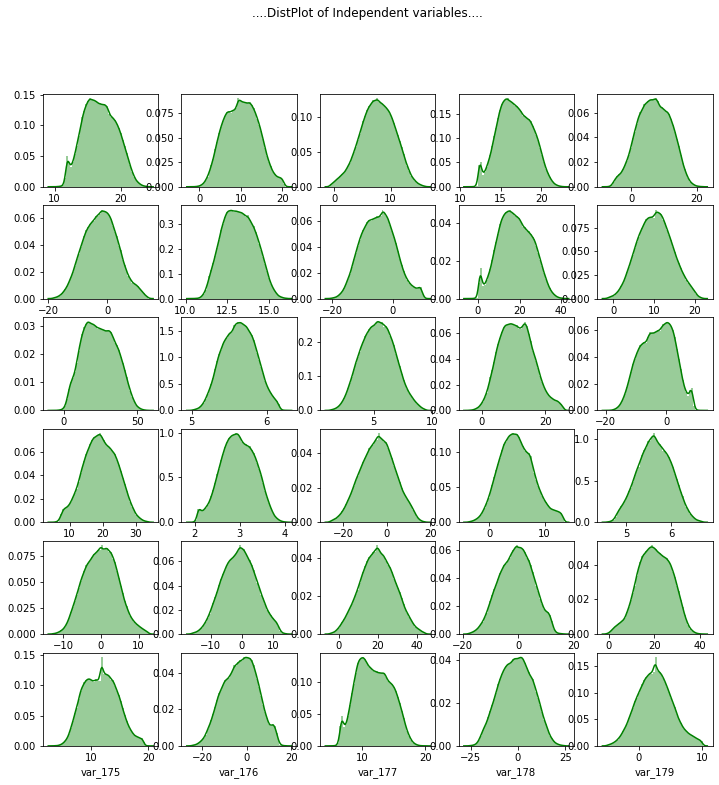

In [49]:
plot_dist(train_independent,0,30)
plot_dist(train_independent,30,60)
plot_dist(train_independent,60,90)
plot_dist(train_independent,90,120)
plot_dist(train_independent,120,150)
plot_dist(train_independent,150,180)

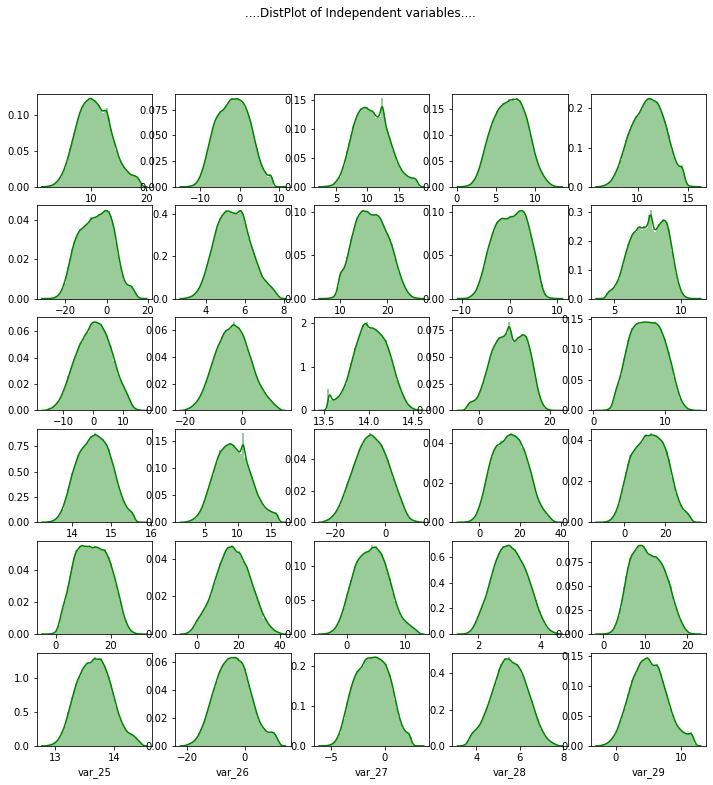

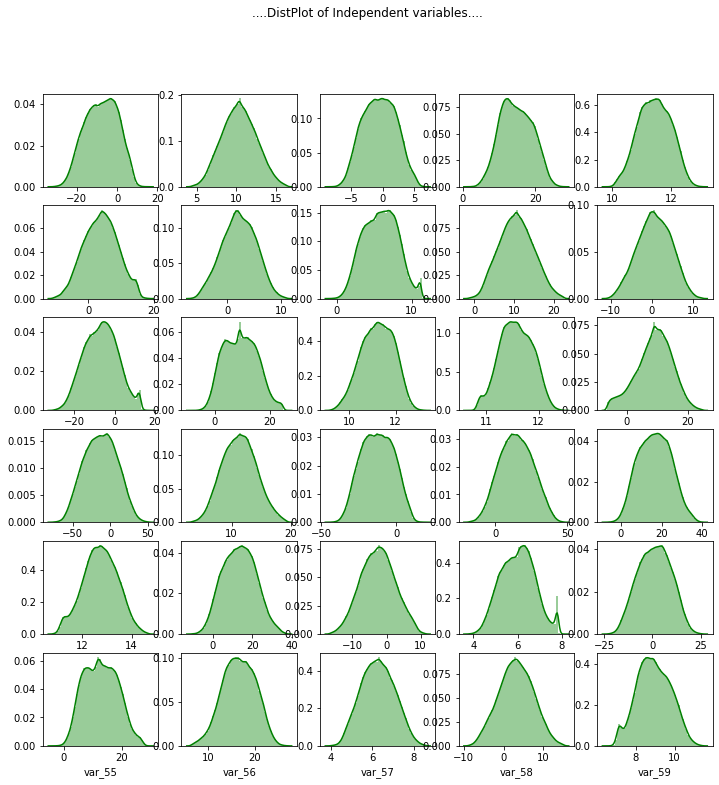

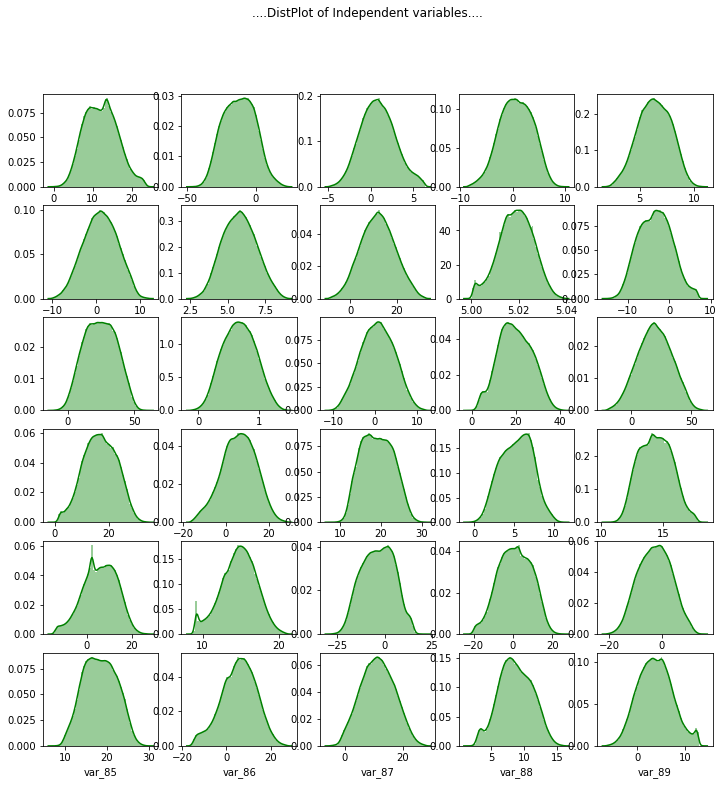

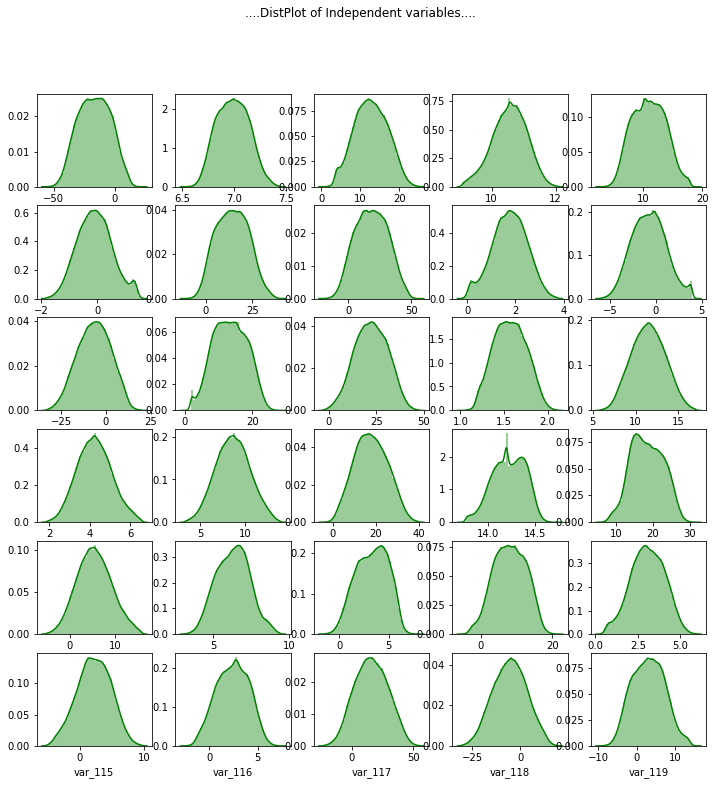

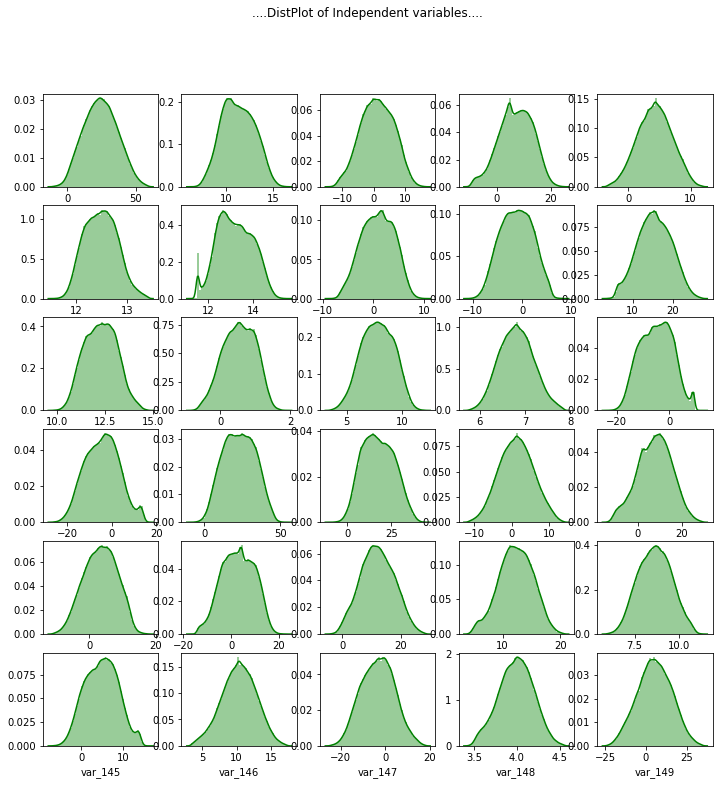

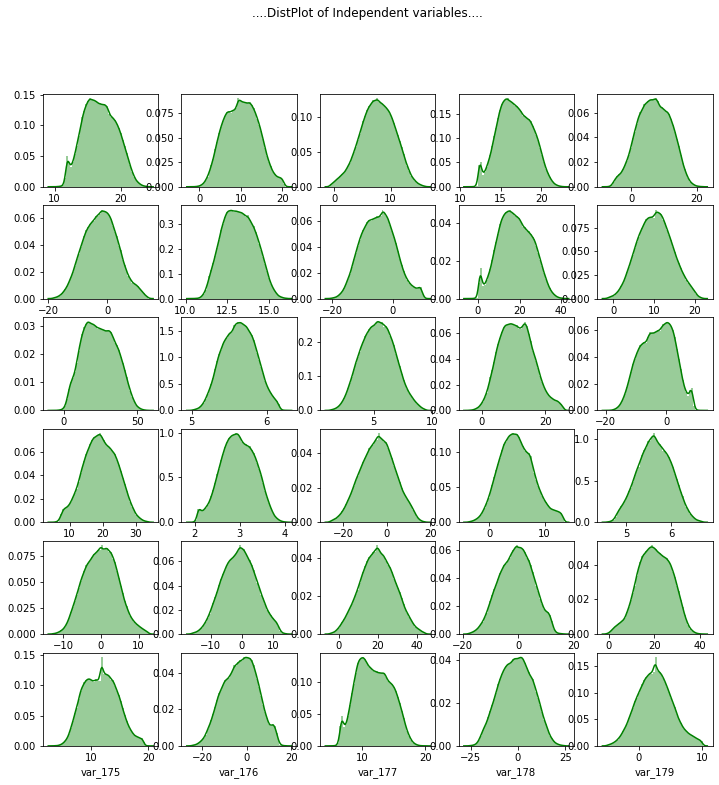

In [50]:
plot_dist(data_test,0,30)
plot_dist(data_test,30,60)
plot_dist(data_test,60,90)
plot_dist(data_test,90,120)
plot_dist(data_test,120,150)
plot_dist(data_test,150,180)

## From the above data visualization, the following insights can be drawn from the data—
### The training as well as the testing data set is NORMALLY distributed.
### The data distribution in the testing as well as training data set is similar.
### The target variable contains data in an imbalanced form i.e. 90% of negative outcome (0) and 10% of positive outcome (1).
### Thus, we can say that the problem statement contains imbalanced data for prediction.


# CORRELATION ANALYSIS

In [51]:
#Using Correlation analysis to depict the relationship between the numeric/continuous data variables
corr_matrix = train_independent.loc[:,numeric_col].corr()
print(corr_matrix)

            var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
var_0    1.000000 -0.000518  0.006459  0.003499  0.001336  0.003415  0.007421   
var_1   -0.000518  1.000000  0.004060  0.000024  0.000132 -0.000907  0.003261   
var_2    0.006459  0.004060  1.000000  0.001008  0.000621  0.001755  0.000928   
var_3    0.003499  0.000024  0.001008  1.000000 -0.000301  0.003175 -0.000569   
var_4    0.001336  0.000132  0.000621 -0.000301  1.000000 -0.001227 -0.000012   
...           ...       ...       ...       ...       ...       ...       ...   
var_195  0.002130 -0.000883 -0.000895  0.001126  0.003860 -0.001194  0.001044   
var_196  0.004113 -0.000343  0.004114 -0.002878  0.000400  0.002855  0.005574   
var_197 -0.000721 -0.004262  0.001013  0.001272  0.000149 -0.000477 -0.003686   
var_198 -0.005947 -0.004992 -0.000906 -0.001633 -0.001502 -0.001136 -0.003184   
var_199  0.003675  0.002320  0.003854  0.000577 -0.000778  0.002873  0.006021   

            var_7     var_8

### From the correlation analysis, we can say that the independent variables are not at all correlated to each other. That is, every variable serves some different information about the prediction to be performed.



# ANOVA TEST

In [52]:
col = data_train.columns

In [53]:
for x in col:
    model = ols('target' + '~' + x, data = data_train).fit() #Oridnary least square method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print(result_anova)

                df        sum_sq       mean_sq             F  PR(>F)
target         1.0  1.807835e+04  1.807835e+04  2.554871e+29     0.0
Residual  199998.0  1.415192e-20  7.076033e-26           NaN     NaN
                df        sum_sq    mean_sq           F         PR(>F)
var_0          1.0     49.619098  49.619098  550.439149  1.476502e-121
Residual  199998.0  18028.732882   0.090145         NaN            NaN
                df        sum_sq    mean_sq           F         PR(>F)
var_1          1.0     45.817419  45.817419  508.158855  2.204417e-112
Residual  199998.0  18032.534561   0.090164         NaN            NaN
                df        sum_sq    mean_sq          F         PR(>F)
var_2          1.0     56.431499  56.431499  626.24774  5.346256e-138
Residual  199998.0  18021.920481   0.090111        NaN            NaN
                df       sum_sq   mean_sq          F        PR(>F)
var_3          1.0      2.20950  2.209500  24.446338  7.647032e-07
Residual  199998.0  180

### All the data variables depict different information and no groups represented the same mean. Thus, we reject the NULL hypothesis and assume that every variable contributes to the prediction of target value.

# FEATURE SCALING -- STANDARDIZATION

In [54]:
def scale_data (data): 
    obj =StandardScaler()
    res_data = pd.DataFrame(obj.fit_transform(data) ,columns=data.columns)
    return res_data

In [55]:
train_independent = scale_data(train_independent)
data_test = scale_data(data_test)

# DEFINING ERROR METRICS FOR THE MODELS

In [56]:
# Defining Error metrics
def error_metric(CM): 
    
    TN = CM.iloc[0,0]
    FN = CM.iloc[1,0]
    TP = CM.iloc[1,1]
    FP = CM.iloc[0,1]
    precision =(TP)/(TP+FP)
    accuracy_model  =(TP+TN)/(TP+TN+FP+FN)
    recall_score  =(TP)/(TP+FN)
    specificity_value =(TN)/(TN + FP)
    False_positive_rate =(FP)/(FP+TN)
    False_negative_rate =(FN)/(FN+TP)
    f1_score =2*(( precision * recall_score)/( precision + recall_score))
    print("Precision value of the model: ",precision)
    print("Accuracy of the model: ",accuracy_model)
    print("Recall value of the model: ",recall_score)
    print("Specificity of the model: ",specificity_value)
    print("False Positive rate of the model: ",False_positive_rate)
    print("False Negative rate of the model: ",False_negative_rate)
    print("f1 score of the model: ",f1_score)
    
    
  

In [57]:
def ROC_curve(y_act ,y_pred) :
    FPR,TPR,thresholds=roc_curve(y_act ,y_pred)
    plt.plot(FPR,TPR)
    plt.title('ROC curve of the model')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    AUC = auc(FPR,TPR)
    print("AUC value of the model: %.2f"%AUC)
    

In [58]:
def Precision_recall_curve(y_act ,y_pred) :
    recall,precision,thresholds=precision_recall_curve(y_act ,y_pred)
    plt.plot(recall,precision)
    plt.title('Precision-Recall curve of the model')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
    

# LOGISTIC REGRESSION 

Precision value of the model:  0.28493852272933656
Accuracy of the model:  0.781095
Recall value of the model:  0.7806249378047567
Specificity of the model:  0.7811475136463185
False Positive rate of the model:  0.21885248635368146
False Negative rate of the model:  0.2193750621952433
f1 score of the model:  0.41748825822589447


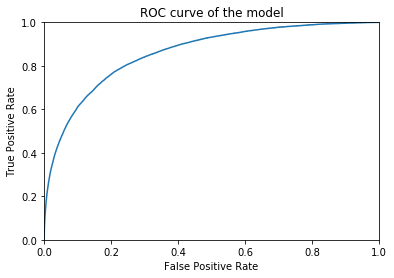

AUC value of the model: 0.86


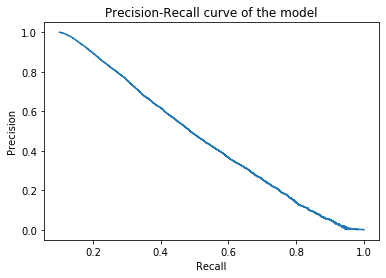

In [59]:
# Logistic Regression
logistic_model = LogisticRegression(class_weight='balanced' , random_state=0).fit(train_independent,train_dependent)
target_predict = logistic_model.predict(train_independent)
targetclass_prob = logistic_model.predict_proba(train_independent)[:, 1]
confusion_matrix = pd.crosstab(train_dependent,target_predict)
error_metric(confusion_matrix)
ROC_curve(train_dependent,targetclass_prob)
Precision_recall_curve(train_dependent,targetclass_prob)

# NAIVE BAYES

Precision value of the model:  0.7181307305530908
Accuracy of the model:  0.921635
Recall value of the model:  0.36242412180316447
Specificity of the model:  0.9841080143633756
False Positive rate of the model:  0.015891985636624386
False Negative rate of the model:  0.6375758781968355
f1 score of the model:  0.48173010151780693


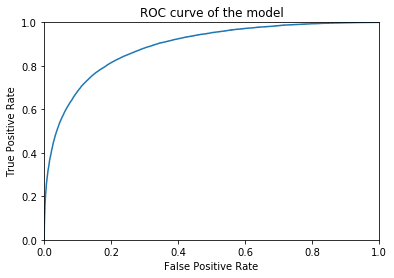

AUC value of the model: 0.89


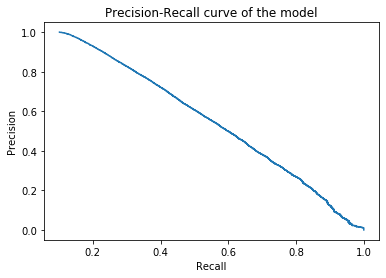

In [60]:
# Naive Baiyes Algorithm
Naive_model = GaussianNB().fit(train_independent,train_dependent)
target_predict = Naive_model.predict(train_independent)
targetclass_prob = Naive_model.predict_proba(train_independent)[:, 1]
confusion_matrix = pd.crosstab(train_dependent,target_predict)
error_metric(confusion_matrix)
ROC_curve(train_dependent,targetclass_prob)
Precision_recall_curve(train_dependent,targetclass_prob)

# DECISION TREES

Precision value of the model:  0.1751485791339959
Accuracy of the model:  0.704375
Recall value of the model:  0.5234849238730221
Specificity of the model:  0.7245833842870008
False Positive rate of the model:  0.2754166157129993
False Negative rate of the model:  0.4765150761269778
f1 score of the model:  0.2624770790973842


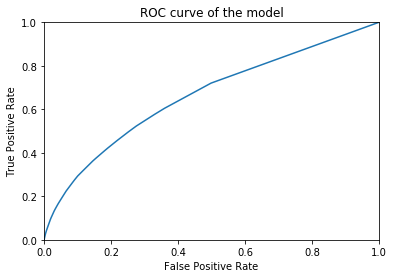

AUC value of the model: 0.66


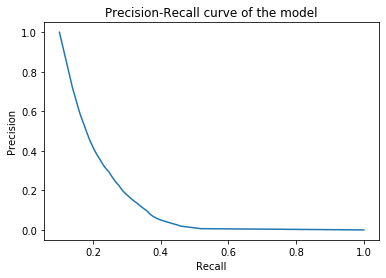

In [61]:
#Decision Trees
decision_model = DecisionTreeClassifier(max_depth= 6,class_weight='balanced' ,random_state =0).fit(train_independent,train_dependent)
target_predict = decision_model.predict(train_independent)
targetclass_prob = decision_model.predict_proba(train_independent)[:, 1]
confusion_matrix = pd.crosstab(train_dependent,target_predict)
error_metric(confusion_matrix)
ROC_curve(train_dependent,targetclass_prob)
Precision_recall_curve(train_dependent,targetclass_prob)

Comparatively a poor model as compared to Logistic Regression and Naive Bayes model, as this model has low f1 score.

# XGBOOST MODEL

In [62]:

xgb_model = XGBClassifier(max_depth=5,scale_pos_weight=2,learning_rate=0.1)


In [63]:
xgb_model.fit(train_independent,train_dependent)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=2, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Precision value of the model:  0.912396990326048
Accuracy of the model:  0.92253
Recall value of the model:  0.253408299333267
Specificity of the model:  0.9972818534535469
False Positive rate of the model:  0.002718146546453069
False Negative rate of the model:  0.746591700666733
f1 score of the model:  0.3966510903426791


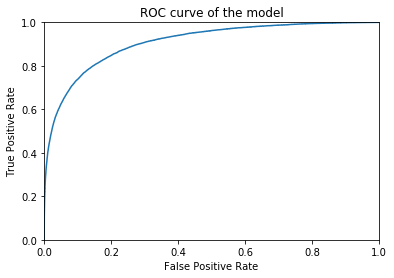

AUC value of the model: 0.91


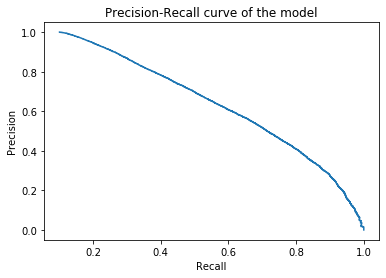

In [64]:
target_predict = xgb_model.predict(train_independent)
targetclass_prob = xgb_model.predict_proba(train_independent)[:, 1]
confusion_matrix = pd.crosstab(train_dependent,target_predict)
error_metric(confusion_matrix)
ROC_curve(train_dependent,targetclass_prob)
Precision_recall_curve(train_dependent,targetclass_prob)

## HYPER PARAMETER TUNING

In [65]:
# Hyper parameter tuning of Logistic Regression

logit_HP = LogisticRegression(class_weight='balanced' , random_state=0 ,penalty= 'l2')
max_iter=[5,10,15,20,25]
C=np.logspace(-5, 3, 20)
# Creating a random grid of Hyper Parameters
logit_GRID = {'max_iter': max_iter,'C':C}
# Building a RandomSearch Cross Validated model over Logistic Regression
logit_CV = RandomizedSearchCV(logit_HP, param_distributions = logit_GRID, n_iter = 10, cv = 10, random_state=0,scoring='roc_auc').fit(train_independent,train_dependent)
# Best Parameters of the LOGSITIC REGRESSION Model


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.22.2.post1-py3.6-win-amd64.egg\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.22.2.post1-py3.6-win-amd64.egg\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
P

In [66]:
Best_Logit_param = logit_CV.best_params_
print("BEST PARAMETERS OF LOGISTIC REGRESSION MODEL:",Best_Logit_param)
Best_Logit_Estimator = logit_CV.best_estimator_
print("BEST ESTIMATORS OF LOGISTIC REGRESSION MODEL:",Best_Logit_Estimator)


BEST PARAMETERS OF LOGISTIC REGRESSION MODEL: {'max_iter': 15, 'C': 1e-05}
BEST ESTIMATORS OF LOGISTIC REGRESSION MODEL: LogisticRegression(C=1e-05, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=15, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Precision value of the model:  0.2859496869164012
Accuracy of the model:  0.7826
Recall value of the model:  0.7770922479848741
Specificity of the model:  0.7832153061111049
False Positive rate of the model:  0.21678469388889507
False Negative rate of the model:  0.2229077520151259
f1 score of the model:  0.4180630654745972


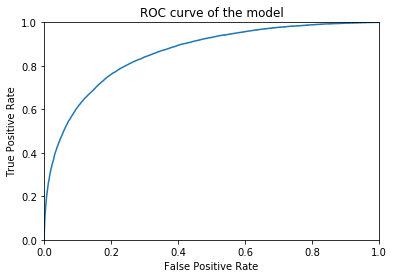

AUC value of the model: 0.86


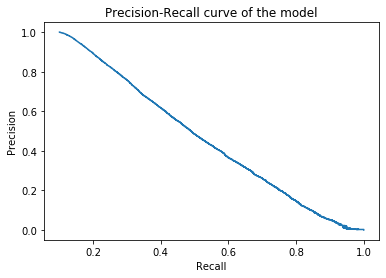

In [67]:
# Prediction on the test dataset
Logit_predict = Best_Logit_Estimator.predict(train_independent)
targetclass_prob = Best_Logit_Estimator.predict_proba(train_independent)[:, 1]
confusion_matrix = pd.crosstab(train_dependent,Logit_predict)
error_metric(confusion_matrix)
ROC_curve(train_dependent,targetclass_prob)
Precision_recall_curve(train_dependent,targetclass_prob)

The basic model as well as tuned model provides the similar results.

In [68]:
#Hyper Parameter tuning on Naive Bayes
Naive_HP = GaussianNB()
var_smooth =np.logspace(-4,-3, num=20)
Naive_GRID = {'var_smoothing': var_smooth}
# Building a RandomSearch Cross Validated model over Logistic Regression
Naive_CV = RandomizedSearchCV(Naive_HP, param_distributions = Naive_GRID, n_iter = 10, cv = 10, random_state=0,scoring='roc_auc').fit(train_independent,train_dependent)
# Best Parameters of the LOGSITIC REGRESSION Model

In [69]:
Best_Naive_param = Naive_CV.best_params_
print("BEST PARAMETERS OF NAIVE BAYES MODEL:",Best_Naive_param)
Best_Naive_Estimator = Naive_CV.best_estimator_
print("BEST ESTIMATORS OF NAIVE BAYES MODEL:",Best_Naive_Estimator)


BEST PARAMETERS OF NAIVE BAYES MODEL: {'var_smoothing': 0.00011288378916846895}
BEST ESTIMATORS OF NAIVE BAYES MODEL: GaussianNB(priors=None, var_smoothing=0.00011288378916846895)


Precision value of the model:  0.7183737911979475
Accuracy of the model:  0.92164
Recall value of the model:  0.36222509702457956
Specificity of the model:  0.9841358072728486
False Positive rate of the model:  0.01586419272715145
False Negative rate of the model:  0.6377749029754204
f1 score of the model:  0.4816088912410691


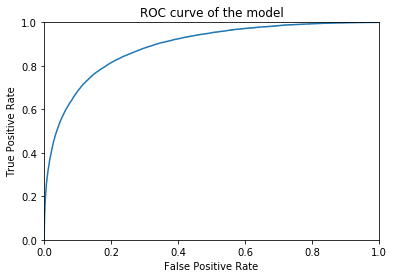

AUC value of the model: 0.89


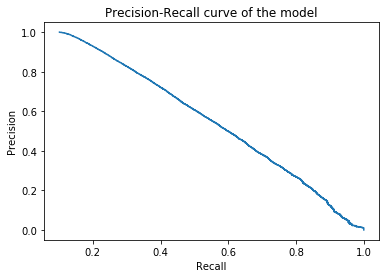

In [70]:
Naive_predict = Best_Naive_Estimator.predict(train_independent)
targetclass_prob = Best_Naive_Estimator.predict_proba(train_independent)[:, 1]
confusion_matrix = pd.crosstab(train_dependent,Naive_predict)
error_metric(confusion_matrix)
ROC_curve(train_dependent,targetclass_prob)
Precision_recall_curve(train_dependent,targetclass_prob)

The basic model as well as tuned model provides the similar results.

# CATBOOST MODEL

In [71]:

cat_model = CatBoostClassifier(
        depth=4,
        custom_loss=['AUC'],
        learning_rate=0.3,
        verbose=50,
        iterations=None,
        od_type='Iter',
        early_stopping_rounds=10
).fit(train_independent,train_dependent)

0:	learn: 0.4809724	total: 523ms	remaining: 8m 42s
50:	learn: 0.2467647	total: 7.73s	remaining: 2m 23s
100:	learn: 0.2227076	total: 16.2s	remaining: 2m 24s
150:	learn: 0.2093659	total: 25.2s	remaining: 2m 21s
200:	learn: 0.2006692	total: 34s	remaining: 2m 15s
250:	learn: 0.1943306	total: 42.6s	remaining: 2m 6s
300:	learn: 0.1890763	total: 49.8s	remaining: 1m 55s
350:	learn: 0.1847256	total: 56.9s	remaining: 1m 45s
400:	learn: 0.1808191	total: 1m 3s	remaining: 1m 35s
450:	learn: 0.1770339	total: 1m 10s	remaining: 1m 25s
500:	learn: 0.1736544	total: 1m 17s	remaining: 1m 17s
550:	learn: 0.1703112	total: 1m 24s	remaining: 1m 8s
600:	learn: 0.1671912	total: 1m 31s	remaining: 1m
650:	learn: 0.1642002	total: 1m 38s	remaining: 53.1s
700:	learn: 0.1614790	total: 1m 46s	remaining: 45.4s
750:	learn: 0.1589767	total: 1m 53s	remaining: 37.6s
800:	learn: 0.1563335	total: 2m 1s	remaining: 30.2s
850:	learn: 0.1538016	total: 2m 8s	remaining: 22.5s
900:	learn: 0.1512716	total: 2m 16s	remaining: 15s
950:

Precision value of the model:  0.8983860342555995
Accuracy of the model:  0.94789
Recall value of the model:  0.542840083590407
Specificity of the model:  0.9931407099420796
False Positive rate of the model:  0.006859290057920423
False Negative rate of the model:  0.45715991640959297
f1 score of the model:  0.6767570249984491


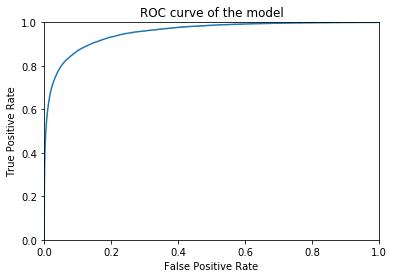

AUC value of the model: 0.95


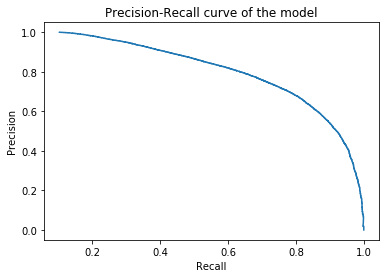

In [72]:
target_predict = cat_model.predict(train_independent)
targetclass_prob = cat_model.predict_proba(train_independent)[:, 1]
confusion_matrix = pd.crosstab(train_dependent,target_predict)
error_metric(confusion_matrix)
ROC_curve(train_dependent,targetclass_prob)
Precision_recall_curve(train_dependent,targetclass_prob)

### Thus, we choose a model following the below criteria--
### High f1 score
### Low False positive rate
### Low False negative rate
### High AUC score
### High level of Precision and Recall
### High Accuracy

## Thus, we select CATBOOST model in Python as the best fit models for this classification problem.


In [73]:
predict=cat_model.predict(data_test)
##Create a dataframe for actual values and predicted values
Result = pd.DataFrame({'Actual_target': train_dependent, 'Predicted_target':predict})

In [74]:
Result.to_csv("CUSTOMER_PREDICTION_PYTHON.csv",index=False)